In [ ]:
import pandas as pd
import math as math
import plotly.express as px
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
def mean(data):
    return round(sum(data)/len(data), 2)
math_score_mean = mean(df['math score'])
writing_score_mean = mean(df['writing score'])
reading_score_mean = mean(df['reading score'])

print(f'A média das notas em matemática foi de {math_score_mean}')
print(f'A média das notas em redação foi de {writing_score_mean}')
print(f'A média das notas em literatura foi de {reading_score_mean}')

A média das notas em matemática foi de 66.09
A média das notas em redação foi de 68.05
A média das notas em literatura foi de 69.17


In [ ]:
def sortAndReIndex(data):
  sorted_data = data.sort_values();
  return sorted_data.reset_index(drop=True)



In [ ]:
import math as math

def trimmedMean(data, percent):
  df_size = len(data);
  trim_size = math.ceil(df_size * percent)
  sorted_data = sortAndReIndex(data)

  lower_limit = trim_size
  upper_limit = df_size - trim_size

  trimmed_notes = sorted_data.iloc[lower_limit : upper_limit]

  return mean(trimmed_notes)
   
math_trimmed_mean = trimmedMean(df['math score'], 0.12)
writing_trimmed_mean = trimmedMean(df['writing score'], 0.18)
reading_trimmed_mean = trimmedMean(df['reading score'], 0.22)

print(f'A média aparada das notas em matemática foi de {math_trimmed_mean}')
print(f'A média aparada das notas em redação foi de {writing_trimmed_mean}')
print(f'A média aparada das notas em literatura foi de {reading_trimmed_mean}')

  


A média aparada das notas em matemática foi de 66.38
A média aparada das notas em redação foi de 68.58
A média aparada das notas em literatura foi de 69.59


In [ ]:
import math as math
def median(data):
  df_size = len(data)
  sorted_data = sortAndReIndex(data) 

  if(df_size % 2 == 0):
    md = (sorted_data[df_size/2] + sorted_data[(df_size/2) + 1]) / 2
    return round(md, 2)
  else:
    md = sorted_data[ceil(df_size/2)]
    return round(md, 2)

math_median = median(df['math score'])
writing_median = median(df['writing score'])
reading_median = median(df['reading score'])

print(f'A mediana das notas em matemática foi de {math_median}')
print(f'A mediana das notas em redação foi de {writing_median}')
print(f'A mediana das notas em literatura foi de {reading_median}')



A mediana das notas em matemática foi de 66.0
A mediana das notas em redação foi de 69.0
A mediana das notas em literatura foi de 70.0


In [ ]:
def weightedMean(data, weights):
  wm = (sum(data * weights)) / sum(weights)
  return round (wm, 2)

print(weightedMean(df['math score'], df['math score']))
print(weightedMean(df['math score'], df['reading score']))
print(weightedMean(df['math score'], df['writing score']))
print(weightedMean(df['writing score'], df['writing score']))
print(weightedMean(df['writing score'], df['reading score']))
print(weightedMean(df['writing score'], df['math score']))
print(weightedMean(df['reading score'], df['reading score']))
print(weightedMean(df['reading score'], df['math score']))
print(weightedMean(df['reading score'], df['writing score']))

69.56
68.7
68.8
71.44
71.11
70.85
72.25
71.9
72.28


In [ ]:
def mad(data):
  avgDev = (data - mean(data)).abs()
  return round(mean(avgDev), 2)

print(mad(df['writing score']),mad(df['math score']),mad(df['reading score']))


12.2 12.02 11.78


In [ ]:
def variance (data): 
  powDev = (data - mean(data))**2
  variance = sum(powDev)/(len(data) -1)

  return round(variance, 2)

print(variance(df['writing score']),variance(df['reading score']),variance(df['math score']))


230.91 213.17 229.92


In [ ]:
def std(data):
  return round(variance(data) ** 0.5, 2)
  
std(df['writing score'])



15.2

In [ ]:
def desvio_padrao(dfdp):
  df1 = dfdp - mean(dfdp)
  df1 = df1**2
  dp = (sum(df1)/len(df1))**0.5
  return round(dp,2)

In [ ]:
def correlacao():
  dfm = df.sort_values('math score', ascending = 'true')
  dfr = df.sort_values('reading score', ascending = 'true')
  dfw = df.sort_values('writing score', ascending = 'true')
  dpm = desvio_padrao(dfm['math score'])
  dpr = desvio_padrao(dfr['reading score'])
  dpw = desvio_padrao(dfw['writing score'])
  mm = mean(df['math score'])
  mr = mean(df['reading score'])
  mw = mean(df['writing score'])

  dfMM = df['math score'] * df['math score'] 
  dfMR = df['math score'] * df['reading score'] 
  dfMW = df['math score'] * df['writing score'] 
  dfRR = df['reading score'] * df['reading score']  
  dfRW = df['reading score'] * df['writing score'] 
  dfWW = df['writing score'] * df['writing score'] 

  sm = sum(df['math score'])
  sr = sum(df['reading score'])
  sw = sum(df['writing score'])

  somaMM = sum(dfMM) - (sm*sm/1000)
  somaMR = sum(dfMR) - (sm*sr/1000)
  somaMW = sum(dfMW) - (sm*sw/1000)
  somaRR = sum(dfRR) - (sr*sr/1000)
  somaRW = sum(dfRW) - (sr*sw/1000)
  somaWW = sum(dfWW) - (sw*sw/1000)

  corrMM = somaMM/(1000*(dpm*dpm))
  corrMR = somaMR/(1000*(dpm*dpr))
  corrMW = somaMW/(1000*(dpm*dpw))
  corrRR = somaRR/(1000*(dpr*dpr))
  corrRW = somaRW/(1000*(dpr*dpw))
  corrWW = somaWW/(1000*(dpw*dpw))
  
  d = {'MathScore': [corrMM,corrMR,corrMW],
        'ReadingScore': [corrMR,corrRR,corrRW],
        'WritingScore': [corrMW,corrRW,corrWW]
        }
  dfC = pd.DataFrame(data = d, index=['Math Score', 'Reading Score', 'Writing Score'])    
  return dfC

print(correlacao())

               MathScore  ReadingScore  WritingScore
Math Score      0.999406      0.817499      0.802301
Reading Score   0.817499      1.000396      0.954665
Writing Score   0.802301      0.954665      0.999744


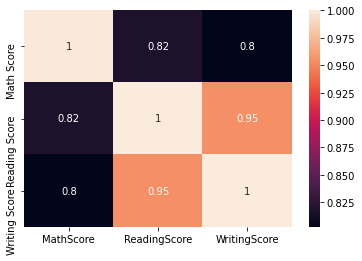

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = correlacao()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
fig = px.histogram(df, x="math score")
fig.show()

In [ ]:
fig = px.histogram(df, x="reading score")
fig.show()

In [ ]:
fig = px.histogram(df, x="writing score")
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
              color='race/ethnicity')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
              color='lunch')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
              color='parental level of education')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
              color='gender')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
              color='test preparation course')
fig.show()

In [ ]:
fig = px.histogram(df, x="test preparation course")
fig.show()

In [ ]:
fig = px.histogram(df, x='race/ethnicity')
fig.show()

In [ ]:
fig = px.pie(df, values='math score', names='test preparation course', title='MathScore/Group')

fig.show()

In [ ]:
fig = px.pie(df, values='reading score', names='test preparation course', title='ReadingScore/Group')
fig.show()

In [ ]:
fig = px.pie(df, values='writing score', names='test preparation course', title='WritingScore/Group')
fig.show()